In [2]:
from sklearn.metrics import classification_report

In [3]:
y = [0,0,0,1,1,0,0]
yhat = [0,0,0,0,1,1,1]

In [10]:
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [11]:
# 농구 게임 데이터 -> 포지션 예상 모델 생성
# 임의의 게임 성적 데이터 ---> 입력 ====> 예상 포지션 출력

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [7]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

C:\Users\NaEunSu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


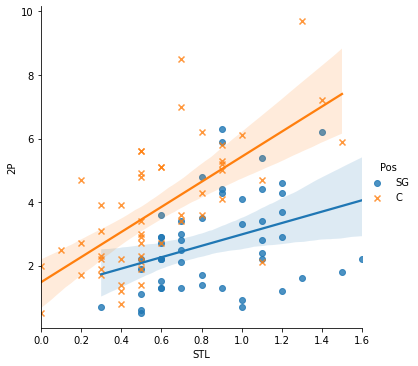

In [27]:
# lmplot: scatterplot + 회귀선

sns.lmplot("STL","2P", data = df, fit_reg=True,
           hue="Pos",markers=["o","x"])
# fit_reg는 회귀선을 표시해주는 파라미터(default = True)

C:\Users\NaEunSu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


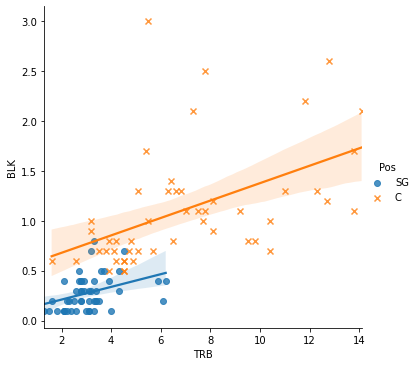

In [39]:
sns.lmplot("TRB","BLK", data = df, fit_reg=True,
           hue="Pos",markers=["o","x"])

C:\Users\NaEunSu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


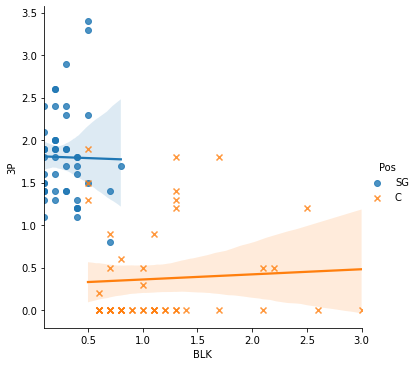

In [41]:
# 분리가 좋음

sns.lmplot("BLK","3P", data = df, fit_reg=True,
           hue="Pos",markers=["o","x"])

In [43]:
df.drop(["2P","AST","STL"], axis=1, inplace=True)

In [44]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [45]:
from sklearn.model_selection import train_test_split

In [56]:
train, test = train_test_split(df, test_size=0.2) # test_size = test데이터 비율

In [57]:
train

,Player,Pos,3P,TRB,BLK
16,Willie Cauley-Stein,C,0.0,4.5,0.6
64,Wesley Matthews,SG,2.4,3.5,0.2
77,Willie Reed,C,0.0,4.7,0.7
86,Nik Stauskas,SG,1.7,2.8,0.4
29,Channing Frye,C,1.9,3.9,0.5
...,...,...,...,...,...
83,Jason Smith,C,0.5,3.5,0.7
21,Jordan Crawford,SG,1.9,1.8,0.1
12,Devin Booker,SG,1.9,3.2,0.3
62,Robin Lopez,C,0.0,6.4,1.4


In [61]:
import pickle

In [62]:
with open("basketball_train.pkl","wb") as train_data:
    pickle.dump(train, train_data)
    
with open("basketball_test.pkl","wb") as test_data:
    pickle.dump(test, test_data)

In [63]:
# 피클로 저장된 파일을 불러오기

with open("basketball_train.pkl", "rb") as train_data:
    mytrain = pickle.load(train_data)
    
with open("basketball_test.pkl", "rb") as test_data:
    mytest = pickle.load(test_data)

In [145]:
mytrain

,Player,Pos,3P,TRB,BLK
16,Willie Cauley-Stein,C,0.0,4.5,0.6
64,Wesley Matthews,SG,2.4,3.5,0.2
77,Willie Reed,C,0.0,4.7,0.7
86,Nik Stauskas,SG,1.7,2.8,0.4
29,Channing Frye,C,1.9,3.9,0.5
...,...,...,...,...,...
83,Jason Smith,C,0.5,3.5,0.7
21,Jordan Crawford,SG,1.9,1.8,0.1
12,Devin Booker,SG,1.9,3.2,0.3
62,Robin Lopez,C,0.0,6.4,1.4


In [65]:
mytest

,Player,Pos,3P,TRB,BLK
19,Allen Crabbe,SG,1.7,2.9,0.3
23,Anthony Davis,C,0.5,11.8,2.2
24,Dewayne Dedmon,C,0.0,6.5,0.8
10,Tarik Black,C,0.0,5.1,0.7
36,Danny Green,SG,1.7,3.3,0.8
60,Alex Len,C,0.0,6.6,1.3
8,Patrick Beverley,SG,1.6,5.9,0.4
17,Jordan Clarkson,SG,1.4,3.0,0.1
55,Sean Kilpatrick,SG,1.5,4.0,0.1
76,J.J. Redick,SG,2.6,2.2,0.2


In [ ]:
# mytest의 [3P, TRB, BLK] 컬럼 값으로
# mytrain의 [3P,TRB, BLK] 컬럼 값으로 구성된 공간에서
# 가장 가까운 거리에 있는 선수 5명의 Pos을 추출한 다음,
# 다수결로 mytest 데이터의 Pos를 예상해보자.
# 그리고 예측된 mytest 데이터의 Pos와 실제 mytest 데이터의 Pos를 비교하여
# 정확도, 정밀도, 재현율, F1Score를 조사해보자

# 혹시 시간이 남으면, 선수 수를 변경하여 높은 정확도를 갖는 k값이 얼마인지 조사해보자.

In [68]:
train_label = mytrain["Pos"]
test_label = mytest["Pos"]

train = mytrain[["3P","TRB","BLK"]]
test = mytest[["3P","TRB","BLK"]]

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
train_n = MinMaxScaler().fit_transform(train)
test_n = MinMaxScaler().fit_transform(test)

In [208]:
from sklearn.metrics import classification_report
import re

In [284]:
# k = 5 일때 정확도
neighbor = []
predic_label=[]
for i in range(len(test_n)):
    for j in range(len(train_n)):
        neighbor.append((np.sqrt(sum((test_n[i]-train_n[j])**2)),i,j))
    neighbor = sorted(neighbor)[:5]
    
    cnt = 0
    for n in neighbor:
        if train_label.iloc[n[2]] == "SG":
            cnt+=1
    if cnt>=3:
        predic_label.append("SG")
    else:
        predic_label.append("C")
print(predic_label)
table = classification_report(test_label, predic_label)
res = re.search("(accuracy[\s]+)([.\d]+)",table)
res.group(2)

['SG', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


'0.50'

In [313]:
# k = 1~ 15 까지 

k_list = []
for k in range(15):
    neighbor = []
    predic_label=[]
    for i in range(len(test_n)):
        for j in range(len(train_n)):
            neighbor.append((np.sqrt(sum((test_n[i]-train_n[j])**2)),i,j))
        neighbor = sorted(neighbor)[:k]

        cnt = 0
        for n in neighbor:
            if train_label.iloc[n[2]] == "SG":
                cnt+=1
        if cnt>=3:
            predic_label.append("SG")
        else:
            predic_label.append("C")
    table = classification_report(test_label, predic_label)
    res = re.search("(accuracy[\s]+)([.\d]+)",table)
    k_list.append([float(res.group(2)),k])

C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaEunSu\anaconda3\lib\site-packages\skle

C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NaEunSu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [315]:
k_list = sorted(k_list, reverse=True)
k_list

[[0.75, 7],
 [0.75, 6],
 [0.7, 14],
 [0.7, 13],
 [0.7, 12],
 [0.7, 11],
 [0.7, 10],
 [0.7, 9],
 [0.7, 8],
 [0.5, 5],
 [0.3, 4],
 [0.3, 3],
 [0.3, 2],
 [0.3, 1],
 [0.3, 0]]

k 값은 7, 6이 제일 정확도가 높게 나온다